## Building Social Networks from Swipe Data

### Project: 

Our goal is to take the swipe data from a university meal system and collect the "predicted social network" from this data, based on the assumption that generally, friends eat dinner with each other, and hence swipe at similar times. 

### Assumptions: 
1. We first assume that we recieve a csv file with the parameters of 'Time Swiped' and 'Name'. 

### Importing necessary libraries and define changeable parameters:

In [29]:
import networkx as nx
import matplotlib
from matplotlib.pyplot import figure
import pandas as pd

In [30]:
epsilon = 5

### Importing CSV and processing dataframe:

Here we need to take the general timeswipe data to create an friendship matrix. We first must take the timeswipe data and find those pairs that satisfy a difference in swipe time less than (base_swipe_time). We then take each of these pairs and create a friendship matrix. In the friendship matrix, we list each edge of friendship between two people within our social network.

If you'd like to view or manipulate the names or times in your dataframe, i've listed them below as "names" or "times"

In [ ]:
time_series = pd.read_csv('time_series.csv')
print(time_series)

In [ ]:
names = time_series[time_series.columns[1]].values.tolist()
print(names)

print("\n")

times = time_series[time_series.columns[0]].values.tolist()
print(times)


### Creating an "Epsilon Function":

We want to define a "friend" as someone who had a time stamp within some "epsilon" of your time. Ex. If alice swipe at 10 seconds and bob, her friend, swipes 2 seconds later, they are probably friends because they swiped within (epsilon) seconds of each other. I've defined the epsilon to be 5 seconds above, hence the difference of alice and bob's time is 2 seconds, so they are friends. 

We'll define a function that takes the input of the index of name and returns true or false as to whether they are friends or not. 

In [33]:
def epsilon_validator(x, y):
    if abs(time_series.iloc[x,0] - time_series.iloc[y,0]) <= epsilon: 
        return True
    else : 
        return False

#### New Dataframe "friendships"

Next we must create a new dataframe called "friendships" that hosts each edge between two nodes that exists in our network. We will create this dataframe and then doing the following steps. 
1. Consider every possible combination of friends in our set of people. 
2. Use epsilon_validator function to identify if they are or aren't friends. 
3. If they are friends, store both names into "subject" and "friend" columns in new friendships dataframe.  

To do so, we will create a temporary dataframe that will host the values of each pair of names, then append (append is depreciated so we'll be using pd.concat) that temporary dataframe (temp_df) to the main dataframe (friendships). 

In [ ]:
friendships = pd.DataFrame(columns=["Subject", "Friend"])
print(friendships)

temp_df = pd.DataFrame()
print(temp_df)

In [ ]:
i = 0

for x in range(len(time_series)) :
    for y in range(len(time_series)) :
        if x != y :
            if epsilon_validator(x, y) == True :
                temp_df = pd.DataFrame({'Subject': time_series.iloc[x,1], 'Friend': time_series.iloc[y,1]}, index= [i])
                friendships = pd.concat([friendships, temp_df])
                i += 1

print(friendships)

# list_of_paired_times = [(times[p1], times[p2]) for p1 in range(len(times)) for p2 in range(p1+1,len(times))]
# print(list_of_paired_times)

# print("\n")

# list_of_paired_names = [(names[p1], names[p2]) for p1 in range(len(names)) for p2 in range(p1+1,len(names))]
# print(list_of_paired_names)

### Create Graph Visualization

Using the dataframe, we use the networkx library to draw a graph which contains the friendship pairs that we built earlier in the dataframe. The graph is then styled and can be used to visualize the social network within the university or corporate setting.

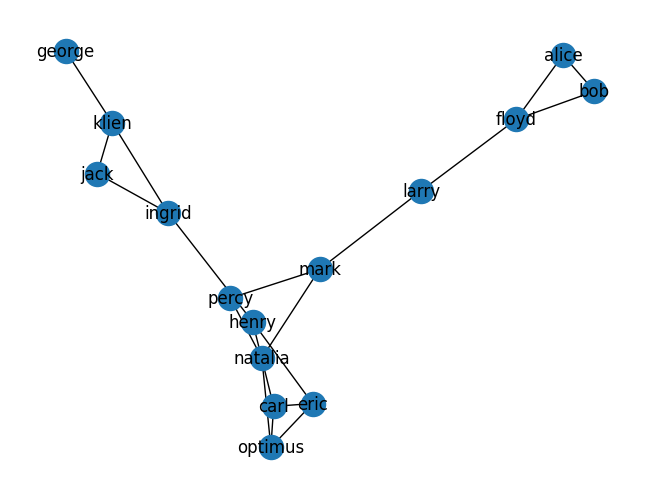

In [36]:
G = nx.Graph()
G = nx.from_pandas_edgelist(friendships, 'Subject', 'Friend')

nx.draw(G, with_labels=True)

In [40]:
print("diameter of network is:", nx.diameter(G))
print("average clustering in network is:", nx.average_clustering(G))

diameter of network is: 10
average clustering in network is: 0.511111111111111


### Relevant Uses and Further Work

#### Further Work

To continue to develop the code further, we would work on two main functionalities. 

1) We'd like to consider the aggregate of many days of data and to do we want to create weights on every edge relative to the number of times that friendship has been observed. To do so, we'd use the (compose all) functionality within the networkx library, which loops through the graphs created for each individual day and implements an appending function. 

2) We'd like to update our epsilon initial value to be the mean of all differences. To do so, we'd loop through the times list i've defined above and create a total variable which is updated to be the total of all the differences between every pair of values in that list. Then we'd calculate the number of unique combinations of the list (counter in the for loops called "i"), and divide our total by the number of combinations to find the average difference for any given combination. 


#### Relevant Uses

Beyond the fact that visualizing the social network around you is simply really cool, there are also relevant and important uses of social network visualization, allowing institutions to understand it's own dynamics at new levels of nuance. Some of the possible uses of this work are listed below.

HR Employee Dissatisfaction, University mental health resources targeting, DEI accountability, targeted marketing strategies. 

<!-- 1. HR Employee Dissatisfaction: 
2. University mental health targeting: 
3. DEI Accountability: 
4. Targeted Marketing:   -->